In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
import pywt
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive/',force_remount=True)



Mounted at /content/drive/


In [ ]:
#reading the data file in the same folder as this file
path = "/content/drive/MyDrive/cluster data/data_all.txt"
#adding header row in the dataframe with numbers
a=np.arange(1023)
df = pd.read_table(path, delimiter='\t', names =a)



In [ ]:
a=np.arange(1023)
print(a)

[   0    1    2 ... 1020 1021 1022]


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,-0.035706,-0.012512,0.017700,0.032654,0.027771,0.011902,-0.001526,-0.003967,-0.001831,-0.000305,...,0.007019,-0.053101,-0.072021,-0.034180,0.022888,0.057068,0.054932,0.029297,0.003052,-0.006104
1,0.021973,0.031738,0.025024,0.005798,-0.015869,-0.030212,-0.030212,-0.022583,-0.013123,0.003357,...,0.036621,0.019836,-0.003052,-0.029602,-0.053101,-0.059204,-0.036011,-0.004883,0.020447,0.045776
2,-0.043640,-0.019531,0.007324,0.021362,0.015259,-0.003052,-0.015259,-0.007019,0.014648,0.028687,...,0.032349,0.037231,0.030823,0.013123,-0.010071,-0.032959,-0.043640,-0.037537,-0.019226,0.008850
3,-0.010681,-0.009155,-0.015259,-0.038452,-0.059204,-0.043945,0.009155,0.053101,0.056152,0.040283,...,-0.047607,-0.116577,-0.118408,-0.066223,-0.004578,0.039978,0.059204,0.054626,0.046997,0.052795
4,0.020142,-0.018005,-0.030518,-0.007019,0.025024,0.026855,-0.003052,-0.028687,-0.024109,0.001831,...,0.029297,-0.133667,-0.252075,-0.253906,-0.161743,-0.034485,0.100098,0.181274,0.150146,0.073853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,0.016785,0.014954,0.021973,0.029907,0.023804,-0.002441,-0.035400,-0.053101,-0.042114,-0.006409,...,-0.015259,-0.005493,0.006714,0.013428,0.009460,-0.000305,-0.004883,0.001221,0.004883,-0.000916
5004,0.010681,0.006104,0.004272,0.005493,0.006409,-0.002136,-0.018311,-0.026245,-0.018921,-0.002136,...,0.005493,0.003967,-0.001221,-0.004578,-0.000916,0.005188,0.006409,0.000916,-0.007629,-0.010986
5005,-0.002747,0.013733,0.025940,0.022888,0.004578,-0.014343,-0.018311,-0.008545,0.004272,0.009155,...,0.021362,0.005798,-0.006409,-0.012207,-0.014343,-0.010986,-0.004578,0.000000,0.001831,0.002136
5006,0.036011,0.017395,-0.010986,-0.037537,-0.043945,-0.024414,0.004272,0.019531,0.018616,0.016479,...,-0.043945,-0.054016,-0.042725,-0.012207,0.026855,0.052185,0.046997,0.021362,-0.001221,-0.017395


In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,-0.035706,-0.012512,0.017700,0.032654,0.027771,0.011902,-0.001526,-0.003967,-0.001831,-0.000305,...,0.007019,-0.053101,-0.072021,-0.034180,0.022888,0.057068,0.054932,0.029297,0.003052,-0.006104
1,0.021973,0.031738,0.025024,0.005798,-0.015869,-0.030212,-0.030212,-0.022583,-0.013123,0.003357,...,0.036621,0.019836,-0.003052,-0.029602,-0.053101,-0.059204,-0.036011,-0.004883,0.020447,0.045776
2,-0.043640,-0.019531,0.007324,0.021362,0.015259,-0.003052,-0.015259,-0.007019,0.014648,0.028687,...,0.032349,0.037231,0.030823,0.013123,-0.010071,-0.032959,-0.043640,-0.037537,-0.019226,0.008850
3,-0.010681,-0.009155,-0.015259,-0.038452,-0.059204,-0.043945,0.009155,0.053101,0.056152,0.040283,...,-0.047607,-0.116577,-0.118408,-0.066223,-0.004578,0.039978,0.059204,0.054626,0.046997,0.052795
4,0.020142,-0.018005,-0.030518,-0.007019,0.025024,0.026855,-0.003052,-0.028687,-0.024109,0.001831,...,0.029297,-0.133667,-0.252075,-0.253906,-0.161743,-0.034485,0.100098,0.181274,0.150146,0.073853


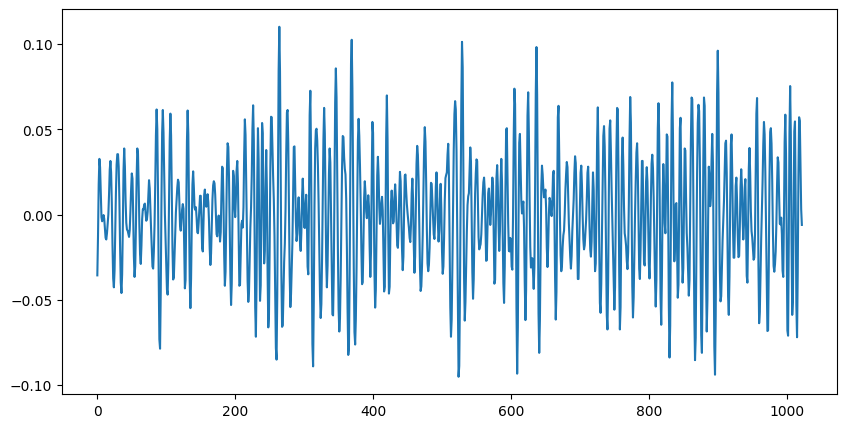

In [ ]:
#plotting first row in the dataframe
a=np.arange(1023)
np.shape(a)
np.shape(df.values[0,:])
plt.figure(figsize=(10, 5))
plt.plot(a,df.values[0,:])

In [ ]:
# Frequency domain features: Energy of 3 level wavlet packets with daubechies base wavelet
def freqdomainfeatures(x):
  wp = pywt.WaveletPacket(data=x, wavelet='db1', maxlevel = 3)
  E=np.zeros([8])
  i=0;
  tmf=[]
  for node in wp.get_level(3, 'natural'):
    # print(node.data)
    E[i]=sum(np.square(node.data))
    i=i+1
  x=E
  return x

In [ ]:
#Obtaining features for the clustering.. Each row is passed through the freqdomainfeatures function to obtain 8 values of energy in 3 level decomposition
[ndata,ntime]=df.shape
fdata=[]
for i in range(ndata):
  data=df.values[i,:]
  feature=freqdomainfeatures(data)
  fdata.append(feature)
fdata=np.array(fdata)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(fdata)

# Transform the data
scaled_data = scaler.transform(fdata)


In [ ]:
df1=pd.DataFrame(scaled_data)

In [ ]:
df1.head(8)

,0,1,2,3,4,5,6,7
0,-0.426554,-0.402730,-0.407593,-0.401044,-0.416394,-0.412884,-0.345447,-0.311570
1,-0.468851,-0.435276,-0.429712,-0.418741,-0.443973,-0.430532,-0.373656,-0.359558
2,-0.456033,-0.448448,-0.461977,-0.440952,-0.463110,-0.446685,-0.414006,-0.398638
3,-0.103098,-0.169116,-0.109801,-0.159633,-0.121552,-0.161894,-0.160467,-0.150779
4,-0.030686,-0.077631,-0.026980,-0.118109,-0.106521,-0.149802,0.272298,0.111425
5,0.410061,0.465792,1.006502,0.924101,0.874256,0.838911,1.149758,0.848623
6,-0.322011,-0.329614,-0.243973,-0.286311,-0.280990,-0.304326,-0.235279,-0.217665
7,1.233874,1.385059,1.286919,1.885585,0.992568,1.782834,2.229890,2.119398


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(scaled_data)

# Transform the data to 3 dimensions
X_pca = pca.transform(scaled_data)


In [ ]:
X_pca

array([[-1.10567074e+00,  8.72315032e-02, -1.53964768e-02],
       [-1.18865990e+00,  8.47891862e-02,  8.97785102e-03],
       [-1.24854381e+00,  4.47425068e-02,  3.83385461e-04],
       ...,
       [-1.39770826e+00,  4.70861300e-02,  1.62765244e-02],
       [-1.26490564e+00,  5.98142491e-02, -9.30847443e-03],
       [-1.37117863e+00,  5.15484224e-02,  4.25800193e-03]])

Text(0.5, 0.92, 'Transformed Data (3 PCs)')

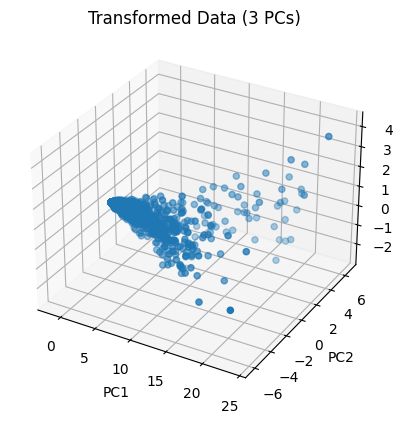

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the transformed data in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Transformed Data (3 PCs)')

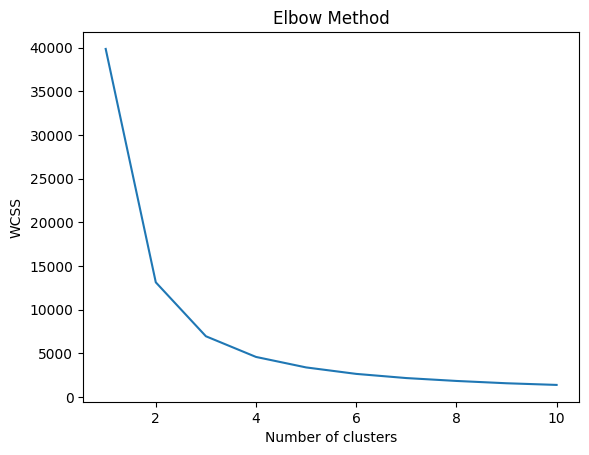

In [ ]:
#evaluating k means clustering using elbow criterion
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


# Create an empty list to store WCSS (Within Cluster Sum of Squares) values
wcss = []


# Define the range of clusters to test
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)


# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import plotly.express as px

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Print the cluster labels for each data point
labels = kmeans.labels_
predictions = kmeans.predict(X_pca)
cluster_counts = np.bincount(labels)
print(cluster_counts)
# Plot clusters
labels = kmeans.labels_

# Calculate the Silhouette score
score = silhouette_score(scaled_data, labels)
ch_index = calinski_harabasz_score(scaled_data, labels)
print("ch_index",ch_index)
print("silhouette",score)
fig = px.scatter_3d(X_pca, x=0, y=1, z=2, color=labels)
fig.show()
# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=predictions)
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[4027  209  772]
ch_index 11494.60960976299
silhouette 0.7376127881637881


In [ ]:
kclusters = [[] for i in range(kmeans.n_clusters)]
#print data points in each cluster
for i, label in enumerate(labels):
    kclusters[label].append(X_pca[i])
    print(f"Data point {i} in cluster {label}: {X_pca[i]}")

# Print the number of data points in each cluster
for i, cluster in enumerate(kclusters):
    print(f"Number of data points in cluster {i}: {len(cluster)}")

Streaming output truncated to the last 5000 lines.
Data point 11 in cluster 0: [-0.27918097  0.06443222  0.05766538]
Data point 12 in cluster 0: [-1.06143141  0.04676957 -0.0704657 ]
Data point 13 in cluster 0: [-1.22606973  0.08137122  0.01323248]
Data point 14 in cluster 1: [18.75034182  5.21260607 -1.66755812]
Data point 15 in cluster 0: [-0.63229168  0.05679685 -0.13667483]
Data point 16 in cluster 0: [-0.42220791  0.24090864 -0.01785433]
Data point 17 in cluster 2: [3.7381279  1.09349691 0.0845796 ]
Data point 18 in cluster 0: [-0.74072961  0.05854523 -0.02595136]
Data point 19 in cluster 2: [2.14933263 0.77685449 0.05052245]
Data point 20 in cluster 2: [ 1.74899399  0.1466631  -0.47198187]
Data point 21 in cluster 0: [-0.74350088  0.07851852  0.00633082]
Data point 22 in cluster 2: [3.78663862 1.02646639 0.22594305]
Data point 23 in cluster 0: [ 0.5599278  -0.12641587 -0.10452324]
Data point 24 in cluster 0: [-0.85519893  0.08568409  0.0303616 ]
Data point 25 in cluster 0: [-0.92

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#kclus1data = pd.DataFrame(columns=['Data point', 'Cluster', 'Values'])
count=0
points = []
for i, label in enumerate(labels):
    if label == 1:  # check if the label is 1 (the second cluster)
       count+=1
       data_point = i
       cluster = label
       values = [X_pca[i]]
       point = X_pca[i]
       points.append(point)
       #fig = px.scatter_3d(values, x=0, y=1, z=2)
      # fig.show()
      #print(f"Data point {i} in cluster {label}: {X_pca[i]}")
       #row = pd.DataFrame([[data_point, cluster, values]], columns=['Data point', 'Cluster', 'Values'])
      # Append the row to the data DataFrame
       #kclus1data = pd.concat([kclus1data, row], ignore_index=True)
       print(f"Data point {i} in cluster {label}: {X_pca[i]}")
print(f"The number of data points in the second cluster is {count}")
#df = pd.DataFrame(kclus1data)
points_array = np.array(points)



Data point 10 in cluster 1: [12.64103079  3.77159391 -0.32928927]
Data point 14 in cluster 1: [18.75034182  5.21260607 -1.66755812]
Data point 26 in cluster 1: [9.37380818 2.6660503  0.24632348]
Data point 29 in cluster 1: [12.16450402  3.98006923  1.37898036]
Data point 32 in cluster 1: [21.23176299  4.44366778  1.15762115]
Data point 44 in cluster 1: [7.11993885 1.42880511 0.41360082]
Data point 48 in cluster 1: [17.37282056  5.72946899 -0.95126747]
Data point 51 in cluster 1: [16.61359379  5.36315739 -0.19227167]
Data point 63 in cluster 1: [7.40185668 1.22775761 0.1513536 ]
Data point 66 in cluster 1: [9.86753291 2.41005085 0.31159425]
Data point 70 in cluster 1: [9.84989843 1.50248638 0.85911411]
Data point 73 in cluster 1: [18.41095806  6.28965767 -0.53462226]
Data point 76 in cluster 1: [14.90460122  4.01033911 -1.64805516]
Data point 80 in cluster 1: [ 7.75263808  2.8473059  -1.27395756]
Data point 83 in cluster 1: [ 9.43617508  3.44469474 -1.21983554]
Data point 89 in cluster 

In [ ]:
fig = px.scatter_3d(points_array, x=0, y=1, z=2)
fig.show()


In [ ]:
points_array

array([[ 1.26410308e+01,  3.77159391e+00, -3.29289266e-01],
       [ 1.87503418e+01,  5.21260607e+00, -1.66755812e+00],
       [ 9.37380818e+00,  2.66605030e+00,  2.46323482e-01],
       [ 1.21645040e+01,  3.98006923e+00,  1.37898036e+00],
       [ 2.12317630e+01,  4.44366778e+00,  1.15762115e+00],
       [ 7.11993885e+00,  1.42880511e+00,  4.13600824e-01],
       [ 1.73728206e+01,  5.72946899e+00, -9.51267473e-01],
       [ 1.66135938e+01,  5.36315739e+00, -1.92271666e-01],
       [ 7.40185668e+00,  1.22775761e+00,  1.51353604e-01],
       [ 9.86753291e+00,  2.41005085e+00,  3.11594249e-01],
       [ 9.84989843e+00,  1.50248638e+00,  8.59114110e-01],
       [ 1.84109581e+01,  6.28965767e+00, -5.34622259e-01],
       [ 1.49046012e+01,  4.01033911e+00, -1.64805516e+00],
       [ 7.75263808e+00,  2.84730590e+00, -1.27395756e+00],
       [ 9.43617508e+00,  3.44469474e+00, -1.21983554e+00],
       [ 1.05937069e+01,  2.81910795e+00, -9.94812243e-01],
       [ 1.20621367e+01,  2.84155393e+00

In [ ]:
# Distribuion based clustering method --- Gaussian Mixture Model


from sklearn.mixture import GaussianMixture
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

# Load sample data
# iris = datasets.load_iris()
# X = iris.data

X = X_pca

# Define the number of clusters
n_clusters = 3

# Create and fit the GMM model
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(X)

# Assign each data point to a cluster
labels = gmm.predict(X)
cluster_counts = np.bincount(labels)

print(cluster_counts)
score2= silhouette_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)
print("ch_index",ch_index)

print("silhouette",score2)


# Plot the data points colorepd by their cluster assignment
fig = px.scatter_3d(X, x=0, y=1, z=2, color=labels)
fig.show()
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')



[1786  842 2380]
ch_index 3083.2225983701783
silhouette 0.2980054536275557


In [ ]:
import pandas as pd

points1 = pd.DataFrame(points_array)
print(points1.shape)

(209, 3)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Define the number of features in your dataset
num_features = 3

# Define the generator network
def create_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(100,)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_features))
    return model

# Define the discriminator network
def create_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(num_features,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the training parameters
num_epochs = 200
batch_size = 10
learning_rate = 0.0001

# Create the generator and discriminator instances
generator = create_generator()
discriminator = create_discriminator()

# Define the loss function and optimizers
loss_function = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(learning_rate)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate)

# Generate a new dataset using GAN
def generate_dataset(real_data, num_samples=1000):
    # Convert the real data to a numpy array
    #real_data = real_data.to_numpy()

    # Convert the real data to TensorFlow tensors
    real_data = tf.convert_to_tensor(real_data, dtype=tf.float32)

    # Create a TensorFlow Dataset for the real data
    real_dataset = tf.data.Dataset.from_tensor_slices(real_data)
    real_dataset = real_dataset.batch(batch_size, drop_remainder=True).shuffle(num_samples)

    # Train the GAN
    for epoch in range(num_epochs):
        for real_batch in real_dataset:
            # Generate noise samples for the generator
            noise = tf.random.normal([batch_size, 100])

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                # Generate fake samples using the generator
                fake_data = generator(noise, training=True)

                # Train the discriminator
                real_output = discriminator(real_batch, training=True)
                fake_output = discriminator(fake_data, training=True)

                real_loss = loss_function(tf.ones_like(real_output), real_output)
                fake_loss = loss_function(tf.zeros_like(fake_output), fake_output)
                total_loss = real_loss + fake_loss

                # Calculate the gradients for discriminator
                disc_gradients = disc_tape.gradient(total_loss, discriminator.trainable_variables)

                # Update the discriminator
                discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

                # Train the generator
                noise = tf.random.normal([batch_size, 100])
                with tf.GradientTape() as gen_tape:
                    fake_data = generator(noise, training=True)
                    fake_output = discriminator(fake_data, training=True)
                    gen_loss = loss_function(tf.ones_like(fake_output), fake_output)

                # Calculate the gradients for generator
                gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)

                # Update the generator
                generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))

    # Generate new samples using the trained generator
    noise = tf.random.normal([num_samples, 100])
    generated_data = generator(noise, training=False)

    return generated_data.numpy()

# Example usage:
# Assuming 'real_data' is your DataFrame containing the real data

In [ ]:
generated_data = generate_dataset(points_array, num_samples=1000)

# Print the generated dataset
print(generated_data)
len(generated_data)

[[13.337919   -1.3233917   1.0875163 ]
 [ 8.0532875  -1.0870992   0.6611519 ]
 [12.419564   -1.2604965   0.46013865]
 ...
 [ 6.570336   -1.1184133   0.4732424 ]
 [ 9.454359   -1.2379531   0.3474529 ]
 [11.069773   -1.3040439   0.5962175 ]]


1000

In [ ]:
fig = px.scatter_3d(generated_data, x=0, y=1, z=2)
fig.show()

In [ ]:
merged_data = np.concatenate([generated_data, X_pca], axis=0)
print(merged_data)
len(merged_data)

[[ 1.33379192e+01 -1.32339168e+00  1.08751631e+00]
 [ 8.05328751e+00 -1.08709919e+00  6.61151886e-01]
 [ 1.24195642e+01 -1.26049650e+00  4.60138649e-01]
 ...
 [-1.39770826e+00  4.70861300e-02  1.62765244e-02]
 [-1.26490564e+00  5.98142491e-02 -9.30847443e-03]
 [-1.37117863e+00  5.15484224e-02  4.25800193e-03]]


6008

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import plotly.express as px

# Perform K-Means clustering with 3 clusters
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(merged_data)

# Print the cluster labels for each data point
labels2= kmeans2.labels_
predictions2 = kmeans2.predict(merged_data)
cluster_counts2 = np.bincount(labels2)
print(cluster_counts2)
# Plot clusters
labels2 = kmeans2.labels_

# Calculate the Silhouette score
score2 = silhouette_score(merged_data, labels2)
ch_index2 = calinski_harabasz_score(merged_data, labels2)
print("ch_index",ch_index2)
print("silhouette",score2)
fig = px.scatter_3d(merged_data, x=0, y=1, z=2, color=labels2)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[ 775 1198 4035]
ch_index 39869.72239271705
silhouette 0.7414546793565303
